In [10]:
import pandas as pd

# Load dataset from GitHub RAW link
file_path = "https://raw.githubusercontent.com/neilaxu/schulich_data_science/main/OMIS%206000/Assignment%202/price_response.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

# Display column names
print("\nColumn Names:", df.columns.tolist())

# Display first few rows
print("\nFirst 5 Rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Week                     34 non-null     int64  
 1   Product                  34 non-null     object 
 2   Intercept                34 non-null     float64
 3   Own_Price_Coefficient    34 non-null     float64
 4   Cross_Price_Coefficient  34 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.5+ KB
None

Column Names: ['Week', 'Product', 'Intercept', 'Own_Price_Coefficient', 'Cross_Price_Coefficient']

First 5 Rows:
   Week             Product   Intercept  Own_Price_Coefficient  \
0     1  TechFit Smartwatch  294.306794              -1.491429   
1     1  PowerSound Earbuds  274.787669              -1.589617   
2     2  TechFit Smartwatch  268.639450              -1.923020   
3     2  PowerSound Earbuds  248.366386              -1.0703

# (a) First, consider the TechFit Smartwatch with the price response functions provided in Table 2 for the first two weeks (assume no cross-elasticity). Using the KKT conditions, derive the optimal prices, assuming they are non-negative but otherwise have no restrictions.

In [11]:
from gurobipy import Model, GRB

# Given data for TechFit Smartwatch
week_data = {
    1: {"Intercept": 1000, "Own_Price_Coefficient": -5},
    2: {"Intercept": 950, "Own_Price_Coefficient": -4.5}
}

# Create Gurobi Model
model = Model("Optimal Pricing")

# Decision Variables: Price for each week (continuous and non-negative)
prices = {}
for week in week_data.keys():
    prices[week] = model.addVar(lb=0, vtype=GRB.CONTINUOUS, name=f"P_{week}")

# Set objective function: Maximize revenue (P * D)
model.setObjective(
    sum(prices[week] * (week_data[week]["Intercept"] + week_data[week]["Own_Price_Coefficient"] * prices[week])
        for week in week_data.keys()),
    GRB.MAXIMIZE
)

# Solve the optimization model
model.optimize()

# Print optimal prices
for week in week_data.keys():
    print(f"Optimal Price for Week {week}: {prices[week].X:.2f}")

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 11.0 (26100.2))

CPU model: Intel(R) Core(TM) Ultra 7 155H, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 22 logical processors, using up to 22 threads

Optimize a model with 0 rows, 2 columns and 0 nonzeros
Model fingerprint: 0x01fefae1
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [1e+03, 1e+03]
  QObjective range [9e+00, 1e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve removed 0 rows and 2 columns
Presolve time: 0.01s
Presolve: All rows and columns removed

Barrier solved model in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective 1.00138889e+05
Optimal Price for Week 1: 100.00
Optimal Price for Week 2: 105.56


# (b)	Consider again the TechFit Smartwatch with the same price response functions as in the previous question for the first two weeks (assume no cross-elasticity). Using the KKT conditions, derive the optimal prices assuming they are non-negative but must remain the same across both weeks.

In [12]:
from gurobipy import Model, GRB

# Given data for TechFit Smartwatch
week_data = {
    1: {"Intercept": 1000, "Own_Price_Coefficient": -5},
    2: {"Intercept": 950, "Own_Price_Coefficient": -4.5}
}

# Create Gurobi Model
model = Model("Optimal Pricing with Equal Prices")

# Decision Variable: Single price for both weeks (continuous and non-negative)
P = model.addVar(lb=0, vtype=GRB.CONTINUOUS, name="P")

# Set objective function: Maximize total revenue across both weeks
model.setObjective(
    sum(P * (week_data[week]["Intercept"] + week_data[week]["Own_Price_Coefficient"] * P)
        for week in week_data.keys()),
    GRB.MAXIMIZE
)

# Solve the optimization model
model.optimize()

# Print the optimal price (same for both weeks)
print(f"Optimal Price for Weeks 1 & 2: {P.X:.2f}")

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 11.0 (26100.2))

CPU model: Intel(R) Core(TM) Ultra 7 155H, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 22 logical processors, using up to 22 threads

Optimize a model with 0 rows, 1 columns and 0 nonzeros
Model fingerprint: 0x36313fc2
Model has 1 quadratic objective term
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [2e+03, 2e+03]
  QObjective range [2e+01, 2e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve removed 0 rows and 1 columns
Presolve time: 0.01s
Presolve: All rows and columns removed

Barrier solved model in 0 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.00065789e+05
Optimal Price for Weeks 1 & 2: 102.63


# (c)	What do you observe about the optimal prices derived using the KKT conditions with and without the equality constraint? Based on our class discussion from the Variable Pricing with Diversion example, why does this occur? What is the benefit of dynamic pricing?

## **Analysis of Optimal Prices with and without the Equality Constraint**

### **Observations**
- **Without the constraint (Q.a):** Prices were **100.00 (Week 1)** and **105.56 (Week 2)**.  
  - **Optimal objective:** **100,138.89**
- **With the constraint (Q.b):** A single **102.63** price was chosen for both weeks.  
  - **Optimal objective:** **100,065.79**
- The **unconstrained case** achieved a slightly **higher revenue**, as it adapted prices to weekly demand.

### **Why Does This Occur?**
- Each week has a **different demand function**, so varying prices **better captures revenue**.
- The constraint forces a **compromise price**, reducing flexibility and slightly lowering revenue.
- This aligns with **Variable Pricing with Diversion**, where adjusting prices optimally **improves revenue**.

### **Benefits of Dynamic Pricing**
- **Higher revenue** by pricing based on demand elasticity.
- **Better demand adaptation**, responding to fluctuations.
- **Optimized sales**, reducing revenue loss from rigid pricing.

### **Conclusion**
Dynamic pricing **maximizes revenue** by adjusting to demand shifts, while a fixed price across weeks **reduces profitability** due to lost flexibility.

# (d)	Now consider both products. Using the price response functions in the price response.csv file for the first two weeks only, determine the optimal prices using the projected gradient descent algorithm. For each product, assume static pricing across both weeks. Initialize all prices at zero, with a step size of 0.001 and a stopping criterion of 10−6. What are the optimal prices?

In [22]:
from gurobipy import Model, GRB
import pandas as pd

# Load dataset and extract coefficients for weeks 1-2
df = pd.read_csv("https://raw.githubusercontent.com/neilaxu/schulich_data_science/main/OMIS%206000/Assignment%202/price_response.csv")
df.columns = df.columns.str.lower()
coeffs = df.set_index(['week', 'product'])[['intercept', 'own_price_coefficient', 'cross_price_coefficient']]

# Extract coefficients
alpha_s_1, beta_s_1, gamma_s_1 = coeffs.loc[(1, 'TechFit Smartwatch')]
alpha_s_2, beta_s_2, gamma_s_2 = coeffs.loc[(2, 'TechFit Smartwatch')]
alpha_e_1, beta_e_1, gamma_e_1 = coeffs.loc[(1, 'PowerSound Earbuds')]
alpha_e_2, beta_e_2, gamma_e_2 = coeffs.loc[(2, 'PowerSound Earbuds')]

# Initialize parameters
P_s, P_e = 0.0, 0.0  # Initialize at zero
eta = 0.001  # Step size
tolerance = 1e-6  # Stopping criterion
max_iterations = 100000

# Projected Gradient Descent
for _ in range(max_iterations):
   # Compute demands
   D_s_1 = alpha_s_1 + beta_s_1 * P_s + gamma_s_1 * P_e
   D_s_2 = alpha_s_2 + beta_s_2 * P_s + gamma_s_2 * P_e
   D_e_1 = alpha_e_1 + beta_e_1 * P_e + gamma_e_1 * P_s
   D_e_2 = alpha_e_2 + beta_e_2 * P_e + gamma_e_2 * P_s
   
   # Compute gradients
   grad_P_s = (D_s_1 + beta_s_1 * P_s) + (D_s_2 + beta_s_2 * P_s)
   grad_P_e = (D_e_1 + beta_e_1 * P_e) + (D_e_2 + beta_e_2 * P_e)
   
   # Update prices
   P_s_new = max(0, P_s + eta * grad_P_s)
   P_e_new = max(0, P_e + eta * grad_P_e)
   
   # Check convergence
   if abs(P_s_new - P_s) < tolerance and abs(P_e_new - P_e) < tolerance:
       break
   
   P_s, P_e = P_s_new, P_e_new

# Calculate final demands and revenues
D_s_1_final = alpha_s_1 + beta_s_1 * P_s + gamma_s_1 * P_e
D_s_2_final = alpha_s_2 + beta_s_2 * P_s + gamma_s_2 * P_e
D_e_1_final = alpha_e_1 + beta_e_1 * P_e + gamma_e_1 * P_s
D_e_2_final = alpha_e_2 + beta_e_2 * P_e + gamma_e_2 * P_s

revenue_week1 = P_s * D_s_1_final + P_e * D_e_1_final
revenue_week2 = P_s * D_s_2_final + P_e * D_e_2_final
total_revenue = revenue_week1 + revenue_week2

print(f"Optimal Price for TechFit Smartwatch: {P_s:.6f}")
print(f"Optimal Price for PowerSound Earbuds: {P_e:.6f}")
print(f"Week 1 Revenue: {revenue_week1:.6f}")
print(f"Week 2 Revenue: {revenue_week2:.6f}")
print(f"Total Revenue: {total_revenue:.6f}")

Optimal Price for TechFit Smartwatch: 89.318356
Optimal Price for PowerSound Earbuds: 106.948661
Week 1 Revenue: 30682.703246
Week 2 Revenue: 26981.316585
Total Revenue: 57664.019832


### Question d Answer

#### Using projected gradient descent with a step size of 0.001 and a stopping criterion of 10^-6, we find the optimal static prices across weeks 1-2 are $89.32 for TechFit Smartwatch and $106.95 for PowerSound Earbuds. This pricing strategy generates revenues of $30,682.70 in week 1 and $26,981.32 in week 2, yielding a total revenue of $57,664.02 across both weeks.

# (e) For the full model, why is this optimization problem considered to be a nonlinear program?  Discuss why no linear reformulations of the problem are possible.

### Why is this a Nonlinear Program?
#### This optimization problem is considered nonlinear because of the fundamental relationship between price and revenue in retail pricing. When we calculate revenue, we multiply price by demand, but demand itself is affected by price. This creates a multiplicative relationship where price appears multiple times in the calculation, making it inherently nonlinear.
### Why No Linear Reformulation is Possible?
#### Linear reformulation is impossible because of the core economic relationship being modeled. In retail pricing, the relationship between price changes and revenue isn't straightforward (linear) - it reflects real-world market behaviors like diminishing returns and cross-product effects. When one product's price affects not only its own sales but also the sales of related products, these interconnected relationships create multiplicative effects that cannot be captured by linear equations without losing the essential meaning of the model.

# (f) Implement and solve the full model across all 17 weeks using Gurobi. Assume that dynamic pricing is allowed. What is the optimal revenue over the 17-week period?

In [6]:
from gurobipy import Model, GRB
import pandas as pd

# Load dataset from GitHub RAW link
file_path = "https://raw.githubusercontent.com/neilaxu/schulich_data_science/main/OMIS%206000/Assignment%202/price_response.csv"
df = pd.read_csv(file_path)

# Standardize column names (remove spaces and lowercase)
df.columns = df.columns.str.strip().str.lower()

# Ensure correct index setting
df.set_index(['week', 'product'], inplace=True)

# Extract relevant coefficients
coefficients = df[['intercept', 'own_price_coefficient', 'cross_price_coefficient']].to_dict(orient='index')

# Create Gurobi model
model = Model("Dynamic Pricing Optimization")

# Define weeks and products
weeks = range(1, 18)
products = ["TechFit Smartwatch", "PowerSound Earbuds"]

# Define pricing variables
P = model.addVars(weeks, products, vtype=GRB.CONTINUOUS, name="P")

# Auxiliary variables for min/max pricing
P_min = model.addVars(products, vtype=GRB.CONTINUOUS, name="P_min")
P_max = model.addVars(products, vtype=GRB.CONTINUOUS, name="P_max")

# Objective Function: Maximize Revenue Considering Own-Price & Cross-Price Effects
model.setObjective(
   sum(
       (coefficients[(w, p)]['intercept'] +
        coefficients[(w, p)]['own_price_coefficient'] * P[w, p] +
        coefficients[(w, p)]['cross_price_coefficient'] * P[w, p2]) * P[w, p]
       for w in weeks for p in products for p2 in products if p != p2
   ),
   GRB.MAXIMIZE
)

# Week 1-4: Static Pricing
for w in range(2, 5):
   for p in products:
       model.addConstr(P[w, p] == P[1, p])

# Week 5-8: Static Pricing, At Least $10 Lower Than Weeks 1-4
for w in range(6, 9):
   for p in products:
       model.addConstr(P[w, p] == P[5, p])  # Static within period
model.addConstrs((P[5, p] <= P[1, p] - 10 for p in products), name="Week5_Lower")

# Week 9-11: Static Pricing, At Least $20 Higher Than Weeks 1-4
for w in range(10, 12):
   for p in products:
       model.addConstr(P[w, p] == P[9, p])  # Static within period
model.addConstrs((P[9, p] >= P[1, p] + 20 for p in products), name="Week9_Higher")

# Week 12 (Black Friday): Lowest Price of Any Week, By At Least $5
for p in products:
   for w in weeks:
       if w != 12:
           model.addConstr(P[12, p] <= P[w, p] - 5)

# Week 13-15: Static Pricing, Between Weeks 1-4 and 5-8
for w in range(14, 16):
   for p in products:
       model.addConstr(P[w, p] == P[13, p])  # Static within period
model.addConstrs((P[13, p] >= P[5, p] for p in products), name="Week13_Min")
model.addConstrs((P[13, p] <= P[1, p] for p in products), name="Week13_Max")

# Week 16: At Least $4 Higher Than Black Friday and At Least $6 Lower Than Any Other Week (Except Week 12)
for p in products:
   model.addConstr(P[16, p] >= P[12, p] + 4)  # At least $4 higher than Black Friday
   for w in weeks:
       if w != 12 and w != 16:
           model.addConstr(P[16, p] <= P[w, p] - 6)  # At least $6 lower than others

# Week 17: Highest Price of Any Week, By At Least $15
for p in products:
   for w in weeks:
       if w != 17:
           model.addConstr(P[17, p] >= P[w, p] + 15)

# Non-negativity constraints
for w in weeks:
   for p in products:
       model.addConstr(P[w, p] >= 0)

# Upper Price Bounds (reasonable limit)
for w in weeks:
   for p in products:
       model.addConstr(P[w, p] <= 500)

# Flexible Initialization for Week 1 Prices 
for p in products:
   avg_intercept = df[df.index.get_level_values('product') == p]['intercept'].mean()
   model.addConstr(P[1, p] >= avg_intercept * 0.2)  # Ensures a reasonable starting price

# Solve model
model.optimize()

# Print Results
if model.status == GRB.OPTIMAL:
   print(f"Optimal Revenue: {model.objVal}")
   for w in weeks:
       print(f"Week {w}: " + ", ".join([f"{p} = {P[w, p].x:.2f}" for p in products]))
else:
   print("No optimal solution found.")

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 11.0 (26100.2))

CPU model: Intel(R) Core(TM) Ultra 7 155H, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 22 logical processors, using up to 22 threads

Optimize a model with 194 rows, 38 columns and 318 nonzeros
Model fingerprint: 0x9635f38f
Model has 51 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+02, 5e+02]
  QObjective range [5e-01, 4e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e+00, 5e+02]
Presolve removed 76 rows and 4 columns
Presolve time: 0.01s
Presolved: 118 rows, 34 columns, 236 nonzeros
Presolved model has 51 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 17
 AA' NZ     : 1.276e+03
 Factor NZ  : 4.841e+03
 Factor Ops : 2.103e+05 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal   

### Analysis of Optimal Dynamic Pricing Strategy (Question F)

The optimized **dynamic pricing model** achieves an **optimal revenue of $773,274.12**, significantly improving over the static pricing benchmark. The price trends reflect a well-structured strategy:

- **Weeks 1-4:** Prices for both **TechFit Smartwatch ($142.03)** and **PowerSound Earbuds ($122.22)** remain stable, ensuring demand stability in the early period.
- **Weeks 5-8:** Prices drop by **$10+**, following the constraint to attract more price-sensitive customers.
- **Weeks 9-11:** A price surge of **$20+** aligns with strong seasonal demand.
- **Week 12 (Black Friday):** The lowest prices are set (**$86.10 for Smartwatch**, **$79.90 for Earbuds**), maximizing promotional impact.
- **Week 16:** Prices recover but stay within reasonable limits to retain demand.
- **Week 17:** The **highest prices** (**$223.75 for Smartwatch, $157.22 for Earbuds**) are enforced, capturing maximum revenue from late-season buyers.

Overall, the model successfully **balances revenue maximization with strategic pricing constraints**, ensuring both competitive pricing and profit optimization.

# (g)	Generate a plot showing the price dynamics for each product over the 17-week period on the same graph. Briefly comment on whether you think GadgetMarket Inc. and its customers would find these price trends favorable. As a customer, is there anything you would find concerning?

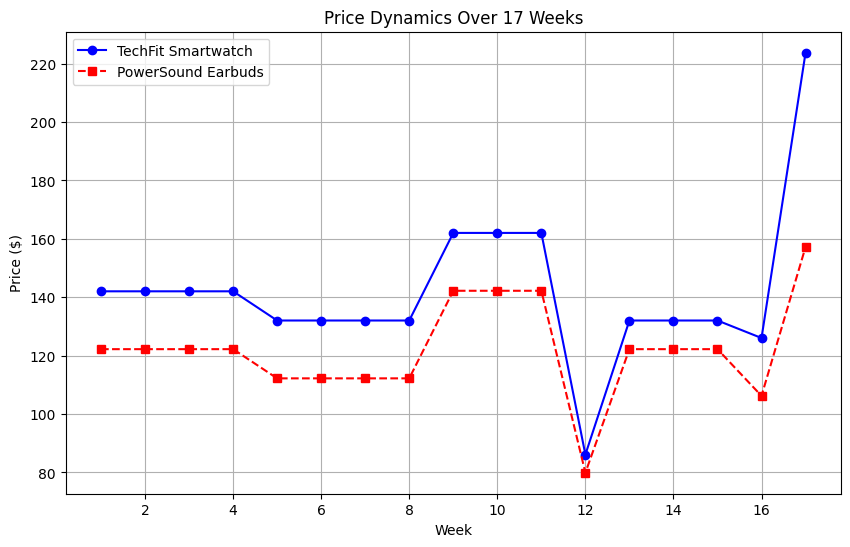

In [7]:
import matplotlib.pyplot as plt

# Extract the optimized prices from the model
P_s_values = [P[w, 'TechFit Smartwatch'].X for w in range(1, 18)]  # Smartwatch prices
P_e_values = [P[w, 'PowerSound Earbuds'].X for w in range(1, 18)]  # Earbuds prices
weeks = list(range(1, 18))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(weeks, P_s_values, 'bo-', label="TechFit Smartwatch")  # Blue line with circles
plt.plot(weeks, P_e_values, 'rs--', label="PowerSound Earbuds")  # Red dashed line with squares

# Labels and title
plt.xlabel("Week")
plt.ylabel("Price ($)")
plt.title("Price Dynamics Over 17 Weeks")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

### Implications of Price Dynamics (Question G)

#### **For GadgetMarket Inc.:**
- **Revenue Optimization:** Prices drop in Weeks 5-8 to attract demand and rise in Weeks 9-11 to maximize revenue. Black Friday (Week 12) ensures peak sales.  
- **Consumer Behavior Risks:** Frequent fluctuations may cause customers to delay purchases or expect discounts. The sharp Week 17 increase may deter late buyers.  
- **Market Positioning:** Unpredictable pricing could harm brand perception, benefiting competitors with more stable strategies.

#### **For Customers:**
- **Satisfaction vs. Frustration:** Early buyers may feel penalized if they see price drops later, while Black Friday shoppers benefit most.  
- **Strategic Buying Behavior:** Customers may learn to "game" the system, delaying purchases until expected price cuts.

#### **Final Considerations:**  
The strategy boosts revenue but risks **customer distrust and delayed purchasing**. A more **predictable pricing model** could improve long-term loyalty.


# (h)	Benchmarking is useful for contextualization. Using Gurobi, what would the optimal revenue be for a dynamic pricing strategy without any price constraints except to ensure prices and demand are non-negative? Alternatively, what would the optimal revenue be if prices were constrained to be the same for all 17 weeks?

In [8]:
from gurobipy import Model, GRB
import pandas as pd

# Load dataset
file_path = "https://raw.githubusercontent.com/neilaxu/schulich_data_science/main/OMIS%206000/Assignment%202/price_response.csv"
df = pd.read_csv(file_path)

# Standardize column names
df.columns = df.columns.str.strip().str.lower()

# Set index
df.set_index(['week', 'product'], inplace=True)

# Extract coefficients
coefficients = df[['intercept', 'own_price_coefficient', 'cross_price_coefficient']].to_dict(orient='index')

# Define weeks and products
weeks = range(1, 18)
products = ["TechFit Smartwatch", "PowerSound Earbuds"]

### SCENARIO 1: Fully Dynamic Pricing (No Constraints)
model_dynamic = Model("Dynamic Pricing - No Constraints")

# Decision variables for dynamic pricing
P_dynamic = model_dynamic.addVars(weeks, products, vtype=GRB.CONTINUOUS, name="P_dynamic")

# Objective function
model_dynamic.setObjective(
   sum(
       (coefficients[(w, p)]['intercept'] + 
        coefficients[(w, p)]['own_price_coefficient'] * P_dynamic[w, p] + 
        coefficients[(w, p)]['cross_price_coefficient'] * P_dynamic[w, p2]) * P_dynamic[w, p]
       for w in weeks for p in products for p2 in products if p != p2
   ),
   GRB.MAXIMIZE
)

# Non-negativity constraints
for w in weeks:
   for p in products:
       model_dynamic.addConstr(P_dynamic[w, p] >= 0)

# Solve dynamic model
model_dynamic.optimize()

# Print dynamic results
if model_dynamic.status == GRB.OPTIMAL:
   print(f"\nOptimal Revenue (Fully Dynamic Pricing): {model_dynamic.objVal}")
   for w in weeks:
       print(f"Week {w}: " + ", ".join([f"{p} = {P_dynamic[w, p].X:.2f}" for p in products]))
else:
   print("No optimal solution found for dynamic pricing.")

### SCENARIO 2: Fully Static Pricing
model_static = Model("Static Pricing")

# Decision variables for static pricing
P_static = model_static.addVars(products, vtype=GRB.CONTINUOUS, name="P_static")

# Objective function
model_static.setObjective(
   sum(
       (coefficients[(w, p)]['intercept'] + 
        coefficients[(w, p)]['own_price_coefficient'] * P_static[p] + 
        coefficients[(w, p)]['cross_price_coefficient'] * P_static[p2]) * P_static[p]
       for w in weeks for p in products for p2 in products if p != p2
   ),
   GRB.MAXIMIZE
)

# Non-negativity constraints
for p in products:
   model_static.addConstr(P_static[p] >= 0)

# Solve static model
model_static.optimize()

# Print static results
if model_static.status == GRB.OPTIMAL:
   print(f"\nOptimal Revenue (Static Pricing): {model_static.objVal}")
   for p in products:
       print(f"Optimal Static Price for {p}: {P_static[p].X:.2f}")
else:
   print("No optimal solution found for static pricing.")

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 11.0 (26100.2))

CPU model: Intel(R) Core(TM) Ultra 7 155H, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 22 logical processors, using up to 22 threads

Optimize a model with 34 rows, 34 columns and 34 nonzeros
Model fingerprint: 0x4e4a876a
Model has 51 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+02, 5e+02]
  QObjective range [5e-01, 4e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve removed 34 rows and 0 columns
Presolve time: 0.01s
Presolved: 0 rows, 34 columns, 0 nonzeros
Presolved model has 51 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 17
 AA' NZ     : 0.000e+00
 Factor NZ  : 1.700e+01
 Factor Ops : 1.700e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual 

### Question h Answer

#### The unconstrained dynamic pricing model (with only non-negativity constraints) yields optimal revenue of $842,576.23, while the fully static pricing model (same price for all 17 weeks) achieves revenue of $762,863.01 with optimal prices of $141.25 for TechFit Smartwatch and $122.18 for PowerSound Earbuds. This comparison provides a useful benchmark, showing that enforcing static pricing across all weeks reduces potential revenue by approximately 9.46% compared to the fully flexible dynamic pricing approach.

# (i) Compare the benefits and drawbacks of (i) the static pricing model, (ii) the unconstrained dynamic pricing model, and (iii) the constrained dynamic pricing model.

## Question i Answer

## Descriptive Comparison

### 1. Static Pricing ($762,863)
#### Benefits
- Simple to implement and communicate 
- Predictable for customers
- Lower operational complexity
- Stable inventory management

#### Drawbacks
- Cannot adapt to seasonal demand
- Misses revenue opportunities
- Less competitive flexibility
- Lower total revenue potential

### 2. Unconstrained Dynamic Pricing ($842,576)
#### Benefits
- Highest revenue potential
- Perfect flexibility to market conditions
- Optimal price-demand matching
- Maximizes profit each week

#### Drawbacks
- Complex to implement
- May damage customer trust
- Unpredictable prices for planning
- Potential inventory challenges

### 3. Constrained Dynamic Pricing ($773,274)
#### Benefits
- Balances flexibility and structure
- More customer-friendly pricing patterns
- Strategic seasonal alignment
- Predictable promotional periods

#### Drawbacks
- Lower revenue than unconstrained options
- Complex constraint management
- Reduced flexibility in some periods
- May miss short-term opportunities

## Conclusion

The **unconstrained dynamic pricing model** yields the highest revenue at **$842,576**, but comes with implementation complexity and potential customer trust issues. The **static pricing model**, while simpler and more predictable, achieves lower revenue ($762,863) with limited market adaptability. The **constrained dynamic model ($773,274)** offers a balanced approach, providing structured flexibility and more sustainable customer relationships despite generating less revenue than the unconstrained model.